# Viewf with fake dem
Compare the output from the `viewf` function with that output from IPW's `viewf` function

In [1]:
import numpy as np
from spatialnc import ipw
import matplotlib.pyplot as plt
import subprocess

from topocalc.viewf import viewf

# %matplotlib widget

## Infinite edge
The DEM will approximate an infinite edge and compare with IPW version

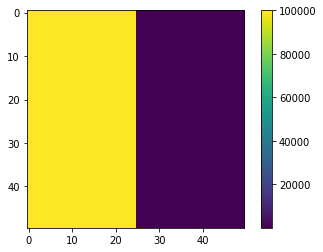

In [5]:
dem = np.ones((50, 50))
dem[:, :25] = 100000
spacing = 10

svf, tvf = viewf(dem, spacing=spacing, nangles=32)

plt.imshow(dem)
plt.colorbar()

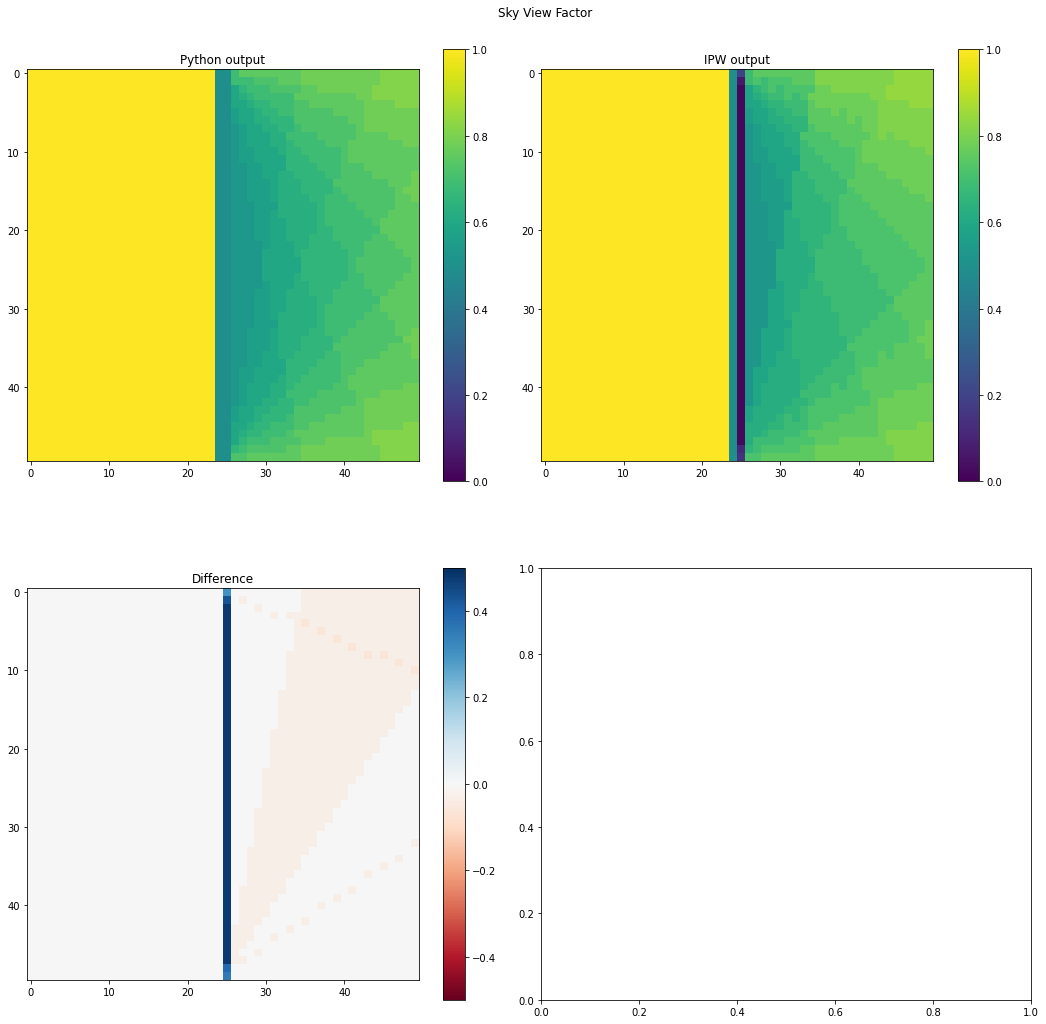

In [3]:
# Create the IPW image and run IPW viewf then plot
csys = 'UTM'
nbits = 16

i = ipw.IPW()
i.new_band(dem)
i.add_geo_hdr(
    coordinates=[0, 0],
    d=[-spacing, spacing],
    units='meters',
    csys=csys
)

i.write(
    'gold_dem_theory.ipw',
    nbits=nbits
)

p = subprocess.Popen(
    '$IPW/bin/viewf -x gold_dem_theory.ipw > gold_viewf_theory.ipw',shell=True,
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    universal_newlines=True).wait()

v = ipw.IPW('gold_viewf_theory.ipw')

fig, ax = plt.subplots(2, 2, figsize = (15, 15))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
fig.suptitle('Sky View Factor')

# IPW original
im0 = ax[0,0].imshow(svf, vmin=0, vmax=1)
ax[0,0].set_title('Python output')
fig.colorbar(im0, ax=ax[0,0])

# horizon output
im1 = ax[0,1].imshow(v.bands[0].data, vmin=0, vmax=1)
ax[0,1].set_title('IPW output')
fig.colorbar(im1, ax=ax[0,1])

# horizon output
d = svf - v.bands[0].data
im1 = ax[1,0].imshow(d, cmap='RdBu', vmin=-0.5, vmax=0.5)
ax[1,0].set_title('Difference')
fig.colorbar(im1, ax=ax[1,0])

# ax[1, 1].hist(d, bins=30)
# ax[1, 1].set_title('Histogram')

plt.show()


## Canyon
The DEM will approximate a deep canyon and compare with IPW version

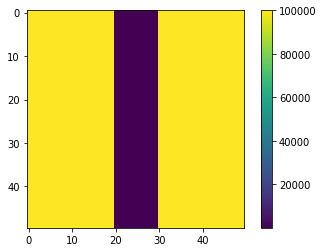

In [4]:
dem = np.ones((50, 50))
dem[:, :20] = 100000
dem[:, 30:] = 100000
spacing = 10

svf, tvf = viewf(dem, spacing=spacing, nangles=32)

plt.imshow(dem)
plt.colorbar()

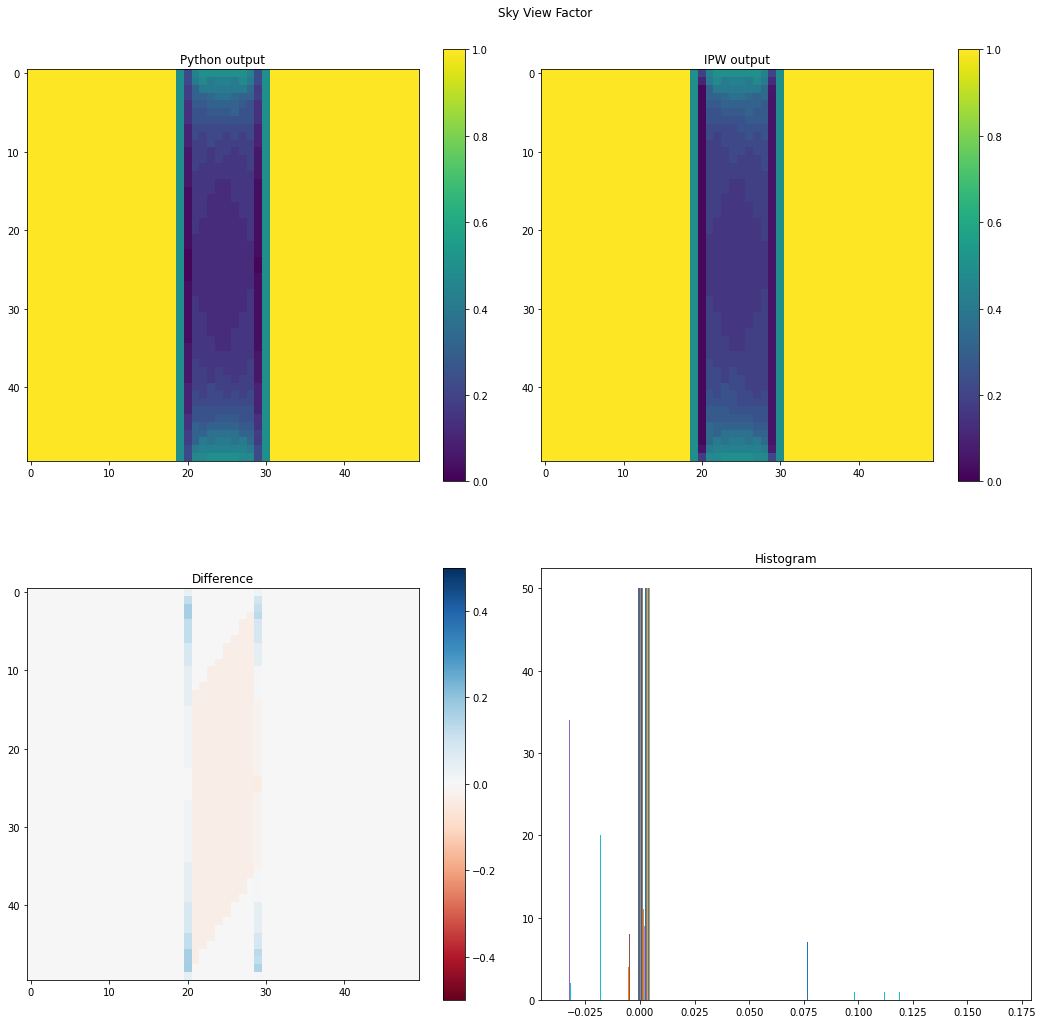

In [5]:
# Create the IPW image and run IPW viewf then plot
csys = 'UTM'
nbits = 16

i = ipw.IPW()
i.new_band(dem)
i.add_geo_hdr(
    coordinates=[0, 0],
    d=[-spacing, spacing],
    units='meters',
    csys=csys
)

i.write(
    'gold_dem_theory.ipw',
    nbits=nbits
)

p = subprocess.Popen(
    '$IPW/bin/viewf -x gold_dem_theory.ipw > gold_viewf_theory.ipw',shell=True,
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    universal_newlines=True).wait()

v = ipw.IPW('gold_viewf_theory.ipw')

fig, ax = plt.subplots(2, 2, figsize = (15, 15))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
fig.suptitle('Sky View Factor')

# IPW original
im0 = ax[0,0].imshow(svf, vmin=0, vmax=1)
ax[0,0].set_title('Python output')
fig.colorbar(im0, ax=ax[0,0])

# horizon output
im1 = ax[0,1].imshow(v.bands[0].data, vmin=0, vmax=1)
ax[0,1].set_title('IPW output')
fig.colorbar(im1, ax=ax[0,1])

# horizon output
d = svf - v.bands[0].data
im1 = ax[1,0].imshow(d, cmap='RdBu', vmin=-0.5, vmax=0.5)
ax[1,0].set_title('Difference')
fig.colorbar(im1, ax=ax[1,0])

ax[1, 1].hist(d, bins=30)
ax[1, 1].set_title('Histogram')

plt.show()
